## Exploratory Data Analysis Using Python on NYC Flights and Weather Data

##### Author : Manas Thakre



In [1]:
# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Numpy version:        1.13.3 (need at least 1.7.1)
SciPy version:        0.19.1 (need at least 0.12.0)
Pandas version:       0.20.3 (need at least 0.11.0)
Mapltolib version:     2.1.0 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)



In this script, we will perform a basic exploratory analysis on an example dataset, and do some data manipulation and visualization. This data set uses the NYCFlights13 data and Weather data. Data can be downloaded here __[Flight csv](http://url)__ and __[Weather csv](http://url)__


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
a = flights_df.dest.unique()
print(a)
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Time to explore and find answers to some questions


#### (a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:

flights_df1=flights_df[ flights_df.dest=='SEA']
flights_df1.shape[0]

3923

There were total of 3923 flights to Seattle from all NYC airports in 2013.

#### (b) How many airlines fly from NYC to Seattle?

In [124]:

carriersN_to_seattle = flights_df1.carrier.unique()
print(carriersN_to_seattle.shape[0])

5


There are 5 airlines that deployed their flight operations to Seattle from NYC in 2013.

#### (c) How many unique air planes fly from NYC to Seattle?

In [125]:

flights_df1['tailnum'].unique().shape[0]


936

 There were 936 unique airplanes that flew from NYC airports to Seattle in 2013

#### (d) What is the average arrival delay for flights from NC to Seattle?

In [126]:

flights_df1['arr_delay'].mean()

-1.0990990990990992

Flights from NYC airports arrived approximately a minute earlier than expected in Seattle.

#### (e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [127]:

#group flights by origin and setting dest to SEA
Flight_SEA = flights_df.loc[flights_df['dest'] == 'SEA'].groupby('origin').size()
print(Flight_SEA)

#Count Percentage
Percent_SEA = print(Flight_SEA*100/Flight_SEA.sum()) 
print(Percent_SEA)

origin
EWR    1831
JFK    2092
dtype: int64
origin
EWR    46.673464
JFK    53.326536
dtype: float64
None


Around 53% of flights to Seattle come from JFK Airport and the remaining are from EWR aiport.

## Flights are often delayed. Lets explore delay patterns.

#### (a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [7]:

#Grouping all flights by year,month,day and then sorting in ascending
print(flights_df.groupby(['year', 'month', 'day']).dep_delay.mean().sort_values(ascending = False,inplace = False).head(1))
print(flights_df.groupby(['year', 'month', 'day']).arr_delay.mean().sort_values(ascending = False,inplace = False).head(1))

year  month  day
2013  3      8      83.536921
Name: dep_delay, dtype: float64
year  month  day
2013  3      8      85.862155
Name: arr_delay, dtype: float64


03/08/2017 was the worst day both in terms of average departure delays as well as average arrival delay. 

#### (b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [8]:
# Worst day to me is the one with max Total Delay
from datetime import datetime
flights_df['total_delay'] = flights_df['arr_delay'] + flights_df['dep_delay']
flights_df['date'] = pd.to_datetime(flights_df.year*10000 + 
                                    flights_df.month*100 + 
                                    flights_df.day,format='%Y%m%d')
flights_df.groupby('date').total_delay.mean().sort_values(ascending = False,inplace = False).head(1)

date
2013-03-08    169.510025
Name: total_delay, dtype: float64

 Again 8th March came as the worst day to fly out of NYC if we are looking at total delay, which is sum of Arrival delay and departure delay

#### (c) Are there any seasonal patterns in departure delays for flights from NYC?

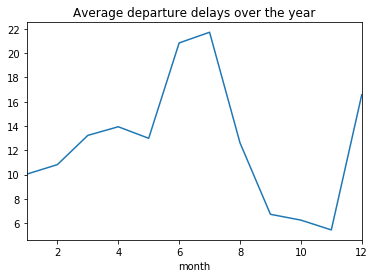

In [9]:

#Plotting departure delays for every month to see the monthly pattern
flights_df.groupby('month').dep_delay.mean().plot(title = 'Average departure delays over the year')
plt.show()

It is very clear that peak summer season i.e June and July are the worst in terms of departure delays. This is expected as most of the schools are closed and people are vacationing creating huge demand for flights. This demand again surge during the Christmas Month.

#### (d) On average, how do departure delays vary over the course of a day?

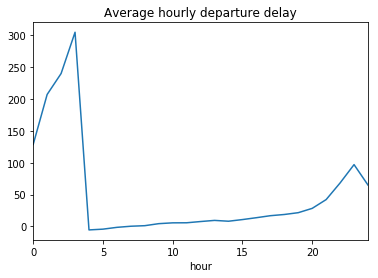

In [10]:

flights_df.groupby('hour').dep_delay.mean().plot(title = "Average hourly departure delay")
plt.show()

 From the plot it looks like the morning flights from 12 midnight to around 3 am have the maximum delays. This could probably be due to less staff during nights or other reasons like fog

## Checking flight speeds

#### Which flight departing NYC in 2013 flew the fastest?

In [12]:

flights_df['speed'] = flights_df.distance*60 / flights_df.air_time
columns = ['flight', 'carrier',  'tailnum', 'origin', 'dest','date', 'speed']
flights_df.sort_values(['speed'], ascending=False)[columns].head(1)

,flight,carrier,tailnum,origin,dest,date,speed
216447,1499,DL,N666DN,LGA,ATL,2013-05-25,703.384615


Delta Airline flight 1499 from LGA to ATL recorded top most speed of 703 miles on 25th May in our dataset

## Everyday Flights

#### Which destinations have flights everyday? 

In [17]:

flt = flights_df.groupby(['carrier', 'flight', 'dest']).size()
daily_flights = flt[flt/365==1]
daily_flights = daily_flights.index.values.tolist()

destinations = []
for flight in daily_flights:
    destination = flight[2]
    if(destination not in destinations):
        destinations.append(destination)

destinations

['SFO',
 'LAX',
 'SJU',
 'MIA',
 'CLT',
 'BUR',
 'FLL',
 'SRQ',
 'MCO',
 'TPA',
 'IAD',
 'HNL',
 'LAS']

##  Do people flying to Seattle prefer one airline over the other based on which month they are flying. In other words, does season determine which carrier people choose?


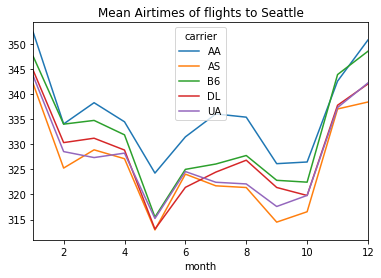

In [18]:
# Plotting careers to Seattle based on their mean airtimes throughout months
flights_df.loc[flights_df['dest'] == 'SEA'].groupby(['carrier','month']).air_time.mean().unstack('carrier').plot(title = "Mean Airtimes of flights to Seattle")
plt.show()

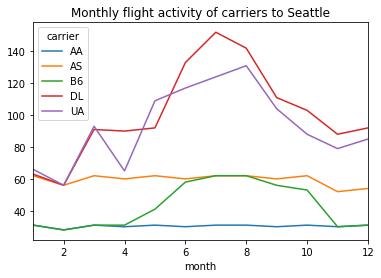

In [19]:
#Plotting the total count of flights by each of these careers to Seattle to see the career activity
flights_df.loc[flights_df['dest'] == 'SEA'].groupby(['carrier','month']).size().unstack('carrier').plot(title = "Monthly flight activity of carriers to Seattle")

It can be easily seen from both these maps that people generally prefer carriers with less airtimes which also reflects in the number of flights by these careers. Since AA & B6 has maximum airtimes compared to others almost throughout year, less is their popularity among Seattle flyers and hence less in their operated flight count.

## Question 6
What weather conditions are associated with flight delays leaving NYC? 

In [20]:
# Your code here
weather_data = pd.read_csv("weather.csv")
df_weather = weather_data.groupby(['year','month','day','origin']).mean()
df_weather.reset_index(level = 0, inplace = True)
df_weather.reset_index(level = 0, inplace = True)
df_weather.reset_index(level = 0, inplace = True)
df_weather.reset_index(level = 0, inplace = True)

flights_group = flights_df.groupby(['year','month','day','origin']).mean()
flights_group.reset_index(level = 0, inplace = True)
flights_group.reset_index(level = 0, inplace = True)
flights_group.reset_index(level = 0, inplace = True)
flights_group.reset_index(level = 0, inplace = True)

MergeDF = pd.merge(flights_group, df_weather, on=['year','month','day','origin'], how='inner')

In [21]:
#Exploring few of the weather conditions that may affect the aerodynamics of flight from my understanding
#Pressure, Humidity, Precipitation, Visibility, Wind speed
import seaborn as sns



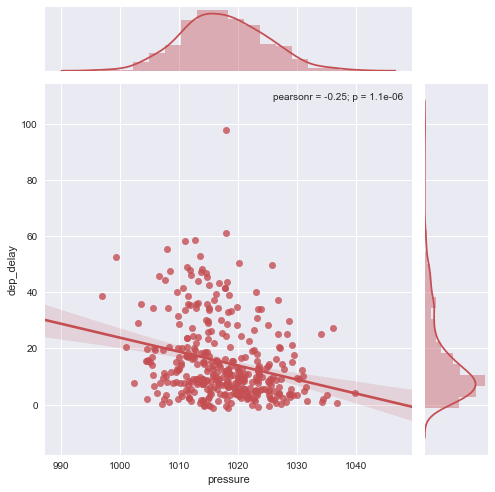

In [22]:
#Pressure vs. Departure delay
sns.set(style="darkgrid", color_codes=True)


plot1 = sns.jointplot("pressure", "dep_delay", data=MergeDF, kind="reg", color="r", size=7)

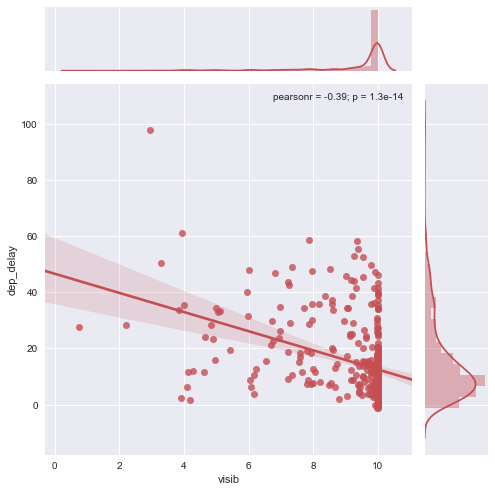

In [25]:
#Visibility vs. Departure delay
plot2 = sns.jointplot("visib", "dep_delay", data=MergeDF, kind="reg", color="r", size=7)

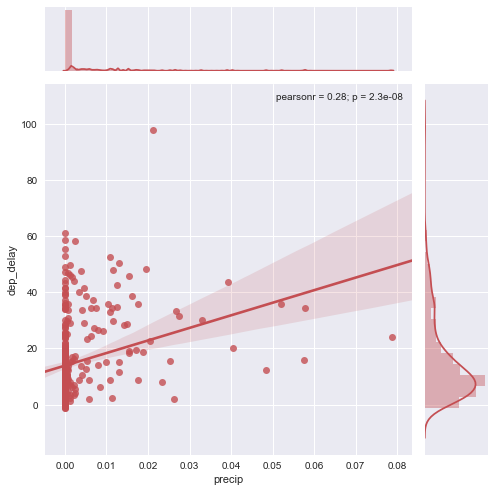

In [26]:
#Precipitation vs. Departure delay
plot3 = sns.jointplot("precip", "dep_delay", data=MergeDF, kind="reg", color="r", size=7)

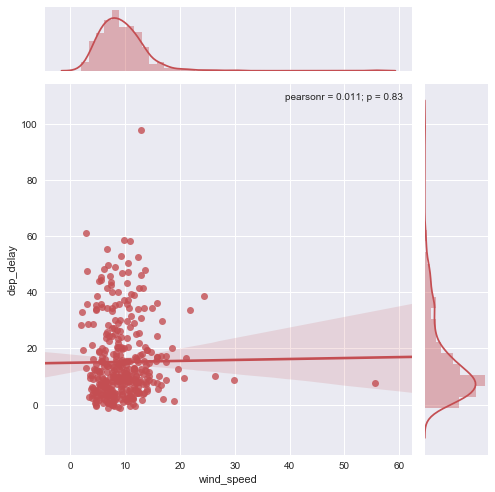

In [27]:
#windspeed vs. Departure delay
plot4 = sns.jointplot("wind_speed", "dep_delay", data=MergeDF, kind="reg", color="r", size=7)

Based on the above graphs:

Visibility, pressure and precipitation do actually have some corelation with departure delays as expected. However, Windspeed doesnt look like a significant contrubutor to delays.
Also, Visibility (mostly affected by gogs as well as rainfall) shows a good negative corelation with Pearson coeeficient for 0.39

I took Reference for seaborn library from : http://seaborn.pydata.org/index.html for plotting these graphs.